#### Hi Profusion Team. Let's get started with the test

**Introduction:**
<br> <br>
Any business wants to maximize the number of customers. To achieve this goal, it is important not only to try to attract new ones, but also to retain existing ones. Retaining a client will cost the company less than attracting a new one. In addition, a new client may be weakly interested in business services and it will be difficult to work with him, while old clients already have the necessary data on interaction with the service.
 <br>

Accordingly, predicting the churn, we can react in time and try to keep the client who wants to leave. Based on the data about the services that the client uses, we can make him a special offer, trying to change his decision to leave the operator. Thanks to this, the task of retention will be easier to implement than the task of attracting new users, about which we do not know anything yet. <br>

We are provided with a dataset from a telecommunications company. The data contains information about almost six thousand users, their demographic characteristics, the services they use, the duration of using the operator's services, the method of payment, and the amount of payment.
<br>

**Objectives:**

The task is to analyze the data and predict the churn of users (to identify people who will and will not renew their contract). The work should include the following mandatory items:

* Description of the data (with the calculation of basic statistics);
* Research of dependencies and formulation of hypotheses;
* Building models for predicting the outflow;
* Comparison of the quality of the obtained models.

**Data Description:**

`telecom_users.csv` contains the following values: <br> <br>

`customerID` - customer id <br>
`gender` - client gender (male / female) <br>
`SeniorCitizen` - whether the client is a pensioner (1, 0) <br>
`Partner` - whether the client is married (Yes, No) <br>
`Dependents` - does the client have dependents (Yes, No) <br>
`tenure` - how many months a person has been a client of the company <br>
`PhoneService` - is the telephone service activated (Yes, No) <br>
`MultipleLines` - whether multiple telephone lines are connected (Yes, No, No phone service) <br>
`InternetService` - client's Internet provider (DSL, Fiber optic, No) <br>
`OnlineSecurity` - is the online security service enabled (Yes, No, No internet service) <br>
`OnlineBackup` - is the online backup service activated (Yes, No, No internet service) <br>
`DeviceProtection` - does the client have equipment insurance (Yes, No, No internet service) <br>
`TechSupport` - is the technical support service activated (Yes, No, No internet service) <br>
`StreamingTV` - is the streaming TV service activated (Yes, No, No internet service) <br>
`StreamingMovies` - is the streaming cinema service activated (Yes, No, No internet service) <br>
`Contract` - type of customer contract (Month-to-month, One year, Two year) <br>
`PaperlessBilling` - whether the client uses paperless billing (Yes, No) <br>
`PaymentMethod` - payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)) <br>
`MonthlyCharges` - current monthly payment <br>
`TotalCharges` - the total amount that the client has paid for the services for the entire time <br>
`Churn` - whether there was a churn (Yes or No) <br>

#### Import required Libraries

In [1]:
import numpy as np # for linear algebra
import pandas as pd # for data processing
import seaborn as sns # for graphs
import matplotlib.pyplot as plt # for graphs
#for removing warnings
import warnings
warnings.filterwarnings('ignore')

#### Getting the data

In [41]:
# Reading the data
data = pd.read_csv("telecom_users.csv")
data.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


### Data Pre-processing & Analysis

In [3]:
# Checking for null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


Fortunately there are no null values. First let's check for any duplicate rows.

In [4]:
# Checking for duplicate rows
print(data.duplicated().sum())

0


Looks like there are no duplicate values. I am going to get rid of the customerID and Unnamed, but I do want to see if Unnamed is correlated to Churn.

In [5]:
df = data[['Unnamed: 0', 'Churn']]
dummy = pd.get_dummies(df, drop_first=True)
dummy.corr()

,Unnamed: 0,Churn_Yes
Unnamed: 0,1.00000,0.00663
Churn_Yes,0.00663,1.00000


As you can see there is no correlation between churn and Unnamed column. So, I am dropping it along with the customer ID

In [6]:
# Dropping columns
data = data.drop(['Unnamed: 0', 'customerID'], axis = 1)

The 'TotalCharges' column is for some reason an object rather than an int and has 10 empty strings in it.

In [7]:
# Converting object to numeric
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors = 'coerce')

In [8]:
# Checking null values
data[data.TotalCharges.isna()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
356,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN,No
634,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
2771,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
3086,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
3255,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
4326,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
5375,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
5382,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5695,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
5951,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No


As tenure  is 0 for those rows, we replace the null values in TotalCharges to 0 as well.

In [9]:
# Filling null values with 0
data['TotalCharges'] = data['TotalCharges'].fillna(0)
#data['TotalCharges'] = data['TotalCharges'].astype(int64)

Now let us see analyze the data.

Analyzing numerical features

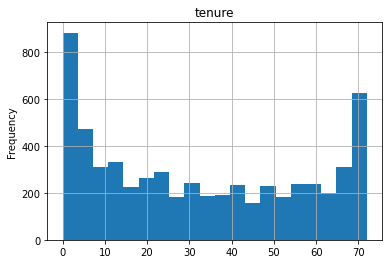

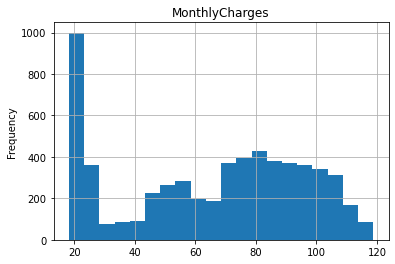

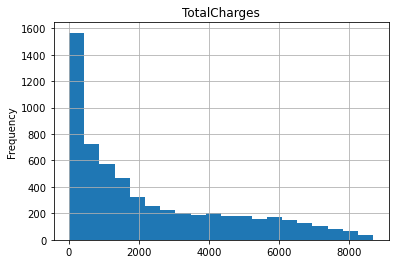

In [10]:
# Numerical Features
num = ['tenure','MonthlyCharges','TotalCharges']
for f in num:
    data[f].plot(kind='hist', bins=20)
    plt.title(f)
    plt.grid()
    plt.show()

As you can see from the above graphs, all the 3 numerical features have skewness in their distributions. So, standardizing the data gives better results.

Analyzing Categorical features

<AxesSubplot:ylabel='PaymentMethod'>

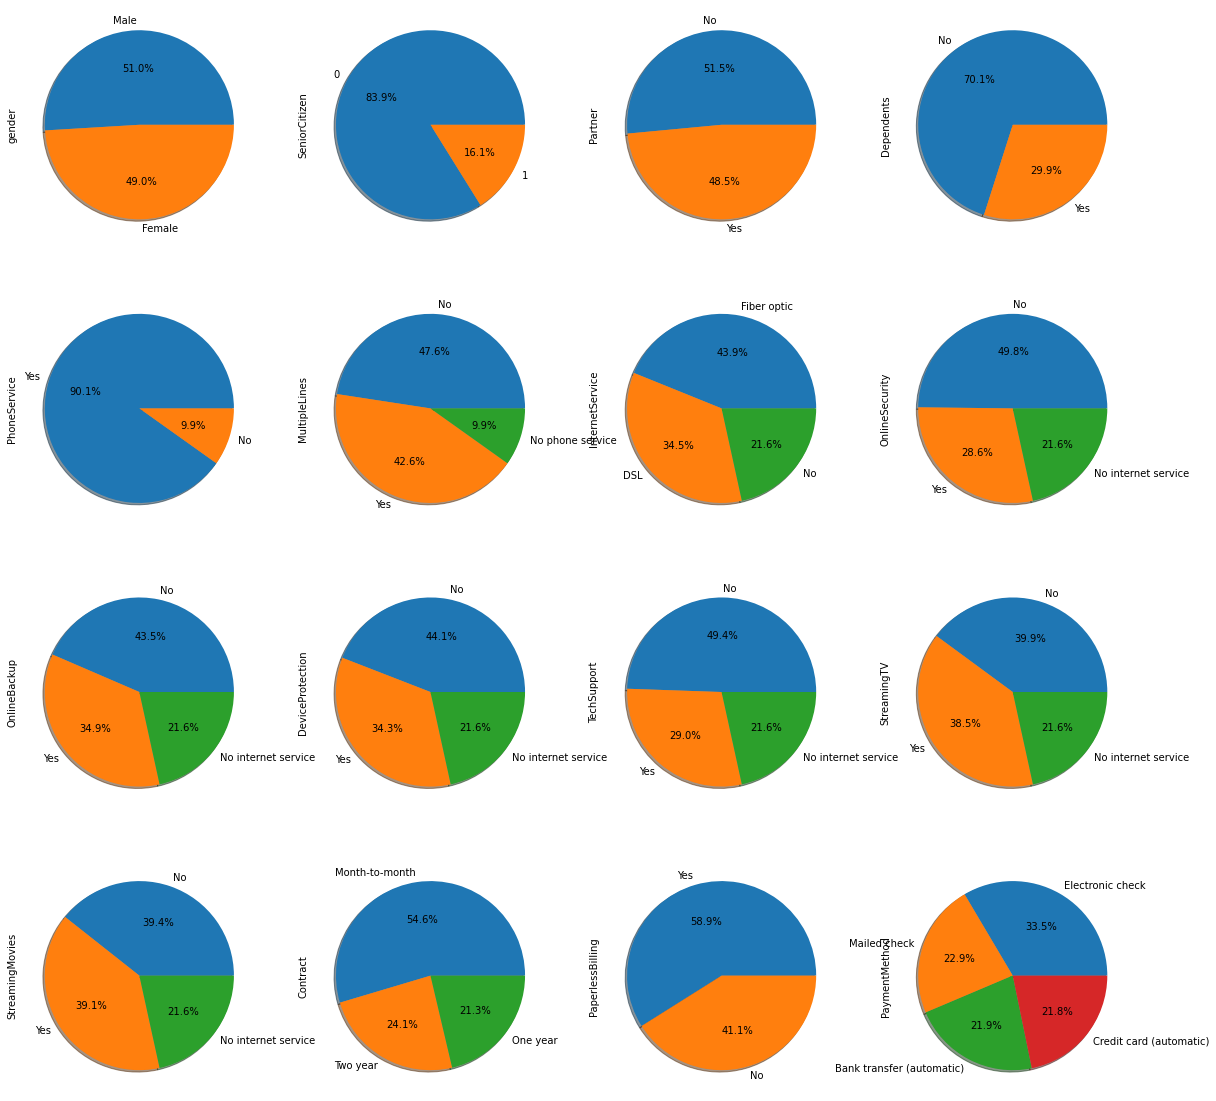

In [11]:
#Plotting Categorical Variables
fig, axes= plt.subplots(4,4,figsize=(20,20))
data["gender"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={"fontsize": 10},ax=axes[0][0])
data["SeniorCitizen"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={"fontsize": 10},ax=axes[0][1])
data["Partner"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={"fontsize": 10},ax=axes[0][2])
data["Dependents"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={"fontsize": 10},ax=axes[0][3])
data["PhoneService"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={"fontsize": 10},ax=axes[1][0])
data["MultipleLines"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={"fontsize": 10},ax=axes[1][1])
data["InternetService"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={"fontsize": 10},ax=axes[1][2])
data["OnlineSecurity"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={"fontsize": 10},ax=axes[1][3])
data["OnlineBackup"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={"fontsize": 10},ax=axes[2][0])
data["DeviceProtection"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={"fontsize": 10},ax=axes[2][1])
data["TechSupport"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={"fontsize": 10},ax=axes[2][2])
data["StreamingTV"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={"fontsize": 10},ax=axes[2][3])
data["StreamingMovies"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={"fontsize": 10},ax=axes[3][0])
data["Contract"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={"fontsize": 10},ax=axes[3][1])
data["PaperlessBilling"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={"fontsize": 10},ax=axes[3][2])
data["PaymentMethod"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={"fontsize": 10},ax=axes[3][3])

**Initial Observations:**

* There is no gender bias in the data.
* Only 16% of the population are Senior Citizens.
* There is no bias in the marraige of the population.
* Only 30% of the population have dependants.
* Still 10% of the population does not have phone service. But our aim here is to retain the existing customers, not to get new customers. So, I am replacing both 'No phone sevice' and 'No' in all columns as 0.
* 44% population have Fiber Optic, 35% have DSL and 21% have no Internet connection
* Only 29% have Online Security and Tech Support, 35% have online Backup & Device Protection, 39% have Streaming TV & Streaming Movies.
* More than half population have Month-to-month contract, while 21% have one year contract, 24% have two year contract.
* Almost 60% of the population are doing paper less billing.
* In payment methods, people are paying more through Electronic check(34%), while the remaining three modes are equally distributed.

Let us see the churn distribution, if the data is imbalanced we need to make it balanced or else the prediction in machine learning algorithms will be biased.

<AxesSubplot:ylabel='Churn'>

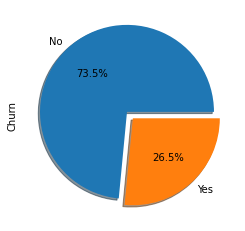

In [12]:
# pie plot
data["Churn"].value_counts().plot.pie(autopct='%1.1f%%',explode=[0.05]*2,shadow=True,textprops={"fontsize": 10})

As you can see from the above graph, the data is highly imbalanced, so we need to balance it before model building.

Now let's convert all the categorical features to numerical features as most of the classification algorithms accepts only numerical features.

In [13]:
# mapping ordinal categorical values to numerical values
data["gender"] = data["gender"].map({'Male': 1,'Female': 0 })
data['Partner'] = data['Partner'].map({'Yes': 1,'No': 0 })
data["Dependents"] = data["Dependents"].map({'Yes': 1,'No': 0 })
data["PhoneService"] = data["PhoneService"].map({'Yes': 1,'No': 0 })
data['MultipleLines'] = data['MultipleLines'].map({'No phone service': 0,'Yes': 1,'No': 0 })
data["InternetService"] = data["InternetService"].map({'No': 'No Internet Service' })
data["OnlineSecurity"] = data["OnlineSecurity"].map({'No internet service': 0,'Yes': 1,'No': 0 })
data["OnlineBackup"] = data["OnlineBackup"].map({'No internet service': 0,'Yes': 1,'No': 0 })
data["DeviceProtection"] = data["DeviceProtection"].map({'No internet service': 0,'Yes': 1,'No': 0 })
data["TechSupport"] = data["TechSupport"].map({'No internet service': 0,'Yes': 1,'No': 0 })
data["StreamingTV"] = data["StreamingTV"].map({'No internet service': 0,'Yes': 1,'No': 0 })
data["StreamingMovies"] = data["StreamingMovies"].map({'No internet service': 0,'Yes': 1,'No': 0 })
data['Contract'] = data['Contract'].map({'Two year': 24,'One year': 12,'Month-to-month': 1 })
data["PaperlessBilling"] = data["PaperlessBilling"].map({'Yes': 1,'No': 0 })
data["Churn"] = data["Churn"].map({'Yes': 1,'No': 0 })

In [14]:
# one_hot encoding the payment method column
dummy_data1 = pd.get_dummies(data["PaymentMethod"],drop_first = True)
dummy_data2 = pd.get_dummies(data["InternetService"],drop_first = True)
data.drop(["PaymentMethod","InternetService"],axis=1,inplace=True)
data = pd.concat([data,dummy_data1,dummy_data2],axis=1)

Let's check correlations between all the variables.

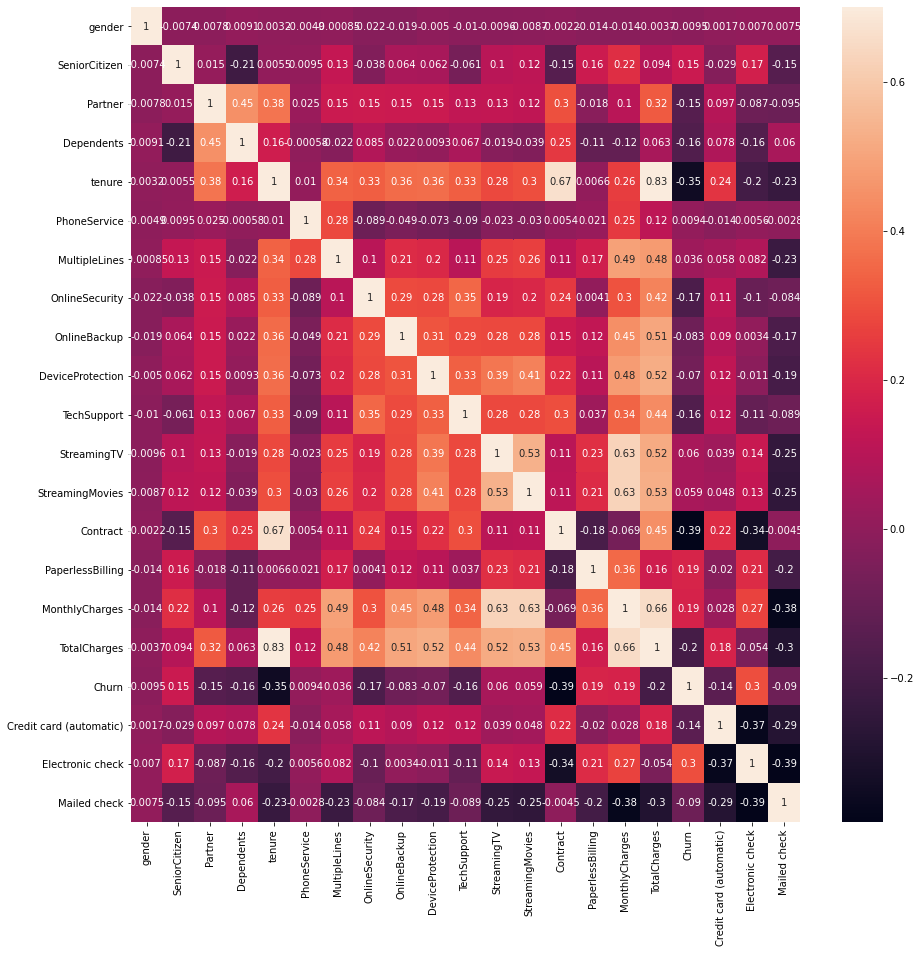

In [15]:
# Correlation plot
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),vmax=.7,cbar=True,annot=True)
plt.savefig('correlation.png')

* So there are some obvious correlations here. For example, if a person has a higher tenure (meaning they've been a client for longer), then they will have more total charges. Monthly Charges is also clearly correlated with TotalCharges. It seems that tenure is most related to contract with a 67% correlation, both of which are most closely related to Churn as well

* What's interesting though is that none of these columns are really that good at determining the churn. One would expect that if someone has been a client for a long time (tenure), they would stay a client, but that doesn't seem to be the case with a -35% correlation. Flipping a coin would be a better determination of if someone is staying or not. Same thing with montly and total charges, there seems to be very little correlation between them and churn which is, again, surprising because how much someone is being charged would seem like a great predictor of whether or not they will renew their subscription but it doesn't seem so.

* When thinking about the tenure and Churn, it makes sense why they're so highly correlated. If someone has a longer contract, they most likely are going to stay a client for a longer period of time. And as we've already seen, someone who has stayed as a client for awhile is more likely to renew their contract, so it makes sense why the contract is significantly correlated with Tenure and Churn.

* We can see an obvious correlation between StreamingTV and StreamingMovies, however it doesn't seem like people do not significantly renew their contract even if they stream TV and/or Movies.

* It doesn't seem like any of the securities (Online Security, Online Backup and Device Protectin) are correlated with each other meaning that having one type of security like OnlineSecurity has almost no effect on whether someone will have another type of security like DeviceProtection. There seems to be no significant correlation between the security someone has and them renewing their contract with Telecom. Security is not that helpful of a predictor when analyzing the churn.

* Perhaps this correlation chart is not giving us the full picture, lets analyze the data a bit more.


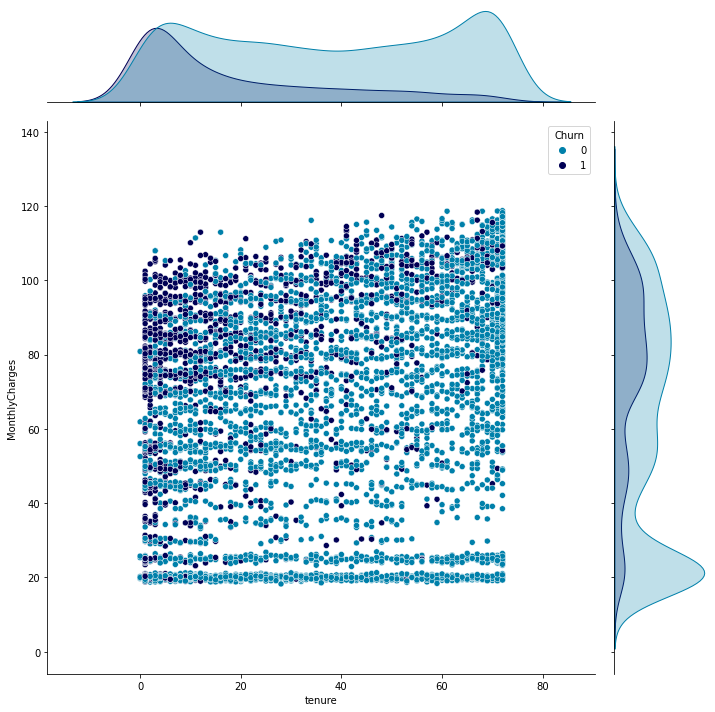

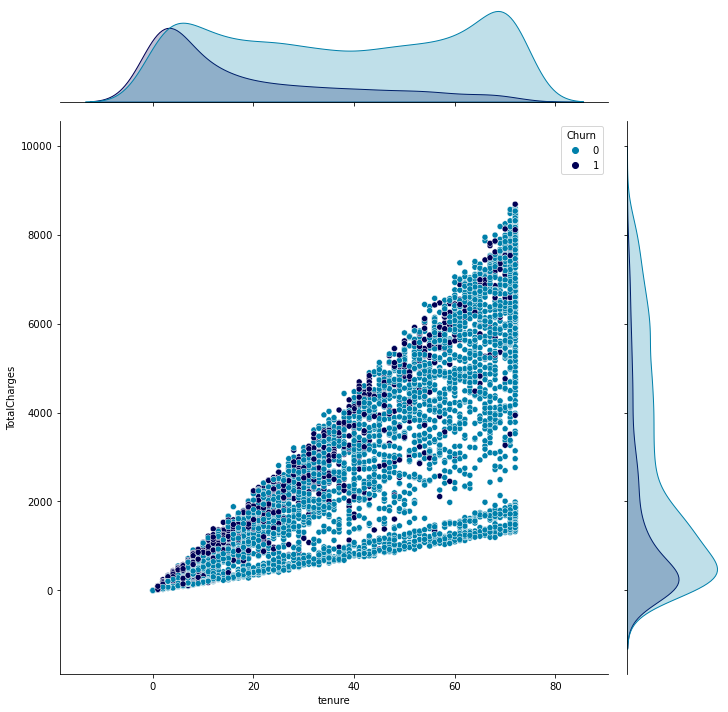

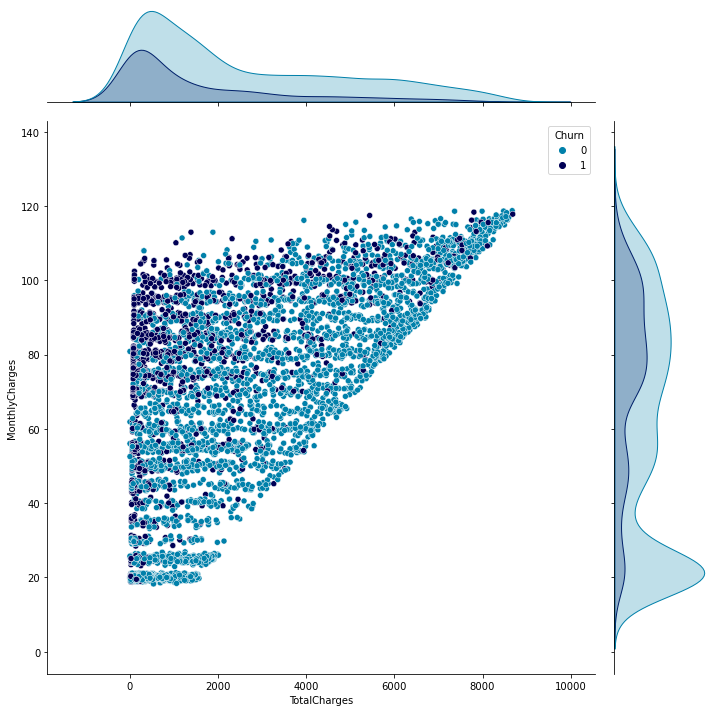

In [16]:
sns.jointplot(data = data, x = 'tenure', y = 'MonthlyCharges', hue = 'Churn', hue_order = [0, 1], palette = 'ocean_r', height = 10)
sns.jointplot(data = data, x = 'tenure', y = 'TotalCharges', hue = 'Churn', hue_order = [0, 1], palette = 'ocean_r', height = 10)
sns.jointplot(data = data, x = 'TotalCharges', y = 'MonthlyCharges', hue = 'Churn', hue_order = [0, 1], palette = 'ocean_r', height = 10)

So it turns out that the pearson correlation does not do the features justice as we can clearly see a much clearer correlation with Churn now.

A significant feature is definetely tenure, people do seem more likely to renew their contracts if they've already been using the service for awhile, no matter how much they are paying or have paid in total.

If Total Charges or Monthly Charges are small, people are also much more likely to keep their contract with telecom. 

An interesting thing to note here is that even if monthly charges are higher, people with a high tenure (have stayed with telecom for awhile) will most likely still renew their contract.

Now let's look more into contract and Churn

<AxesSubplot:xlabel='Contract', ylabel='count'>

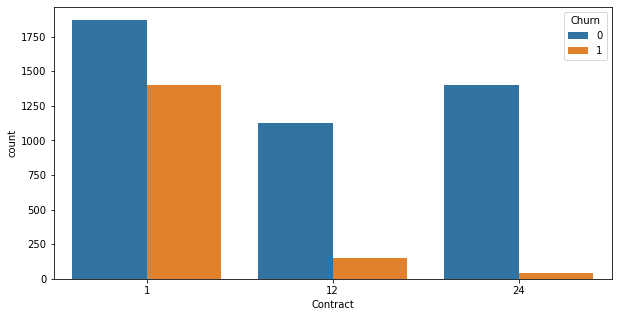

In [17]:
plt.figure(figsize = (10,5))
sns.countplot(data = data, x = 'Contract', hue = 'Churn')

Well the type of Contract someone has with company seems to play a significant role in whether someone will renew their contract or not. Having a 2 year or 1 year contract means that people will most likely renew their contract while most people with a month to month(1) contract tend to not renew their contracts.

But why is the contract so significant? Lets look at the total and monthly pay to see if they are perhaps paying more with a month to month contract.

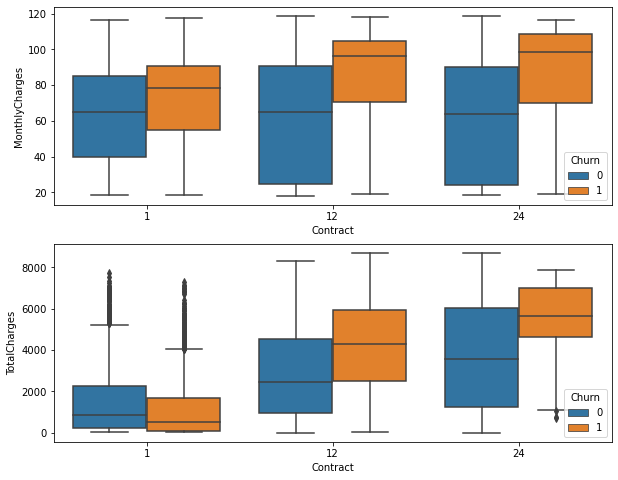

In [18]:
fig, ax = plt.subplots(figsize = (10, 8), nrows = 2)
sns.boxplot(data = data, x = 'Contract', y = 'MonthlyCharges', hue = 'Churn', ax = ax[0])
ax[0].legend(loc = 'lower right', title = 'Churn')
sns.boxplot(data = data, x = 'Contract', y = 'TotalCharges', hue = 'Churn', ax = ax[1])
ax[1].legend(loc = 'lower right', title = 'Churn')
plt.savefig('Charges.png')

What's interesting to notice is that for two year and one year contracts, the median monthly payment can be fairly  high (about 100) before people start becoming less likely to renew their contract, however, the month to month charge does not need to be as high before people stop renewing their contracts. In fact the median total charges for people who did not renew their month to month contract is actually smaller than the median total charges for people who did renew their month to month contract.

Let's look if there are any outliers in the data.

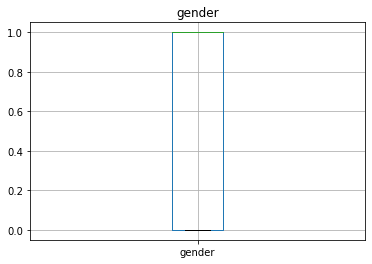

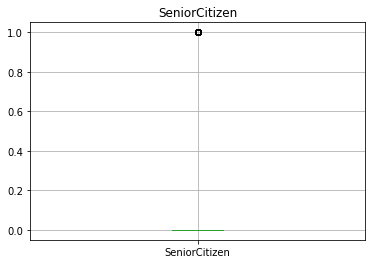

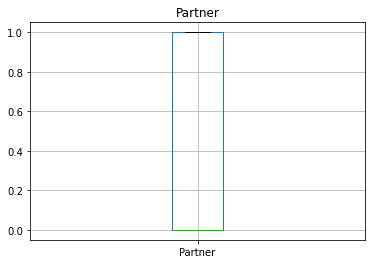

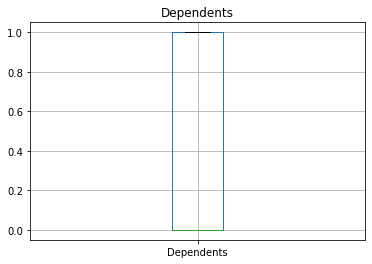

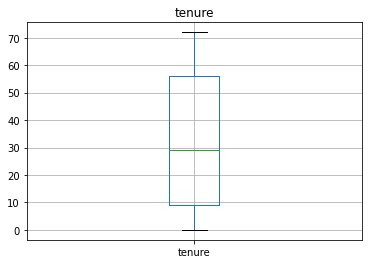

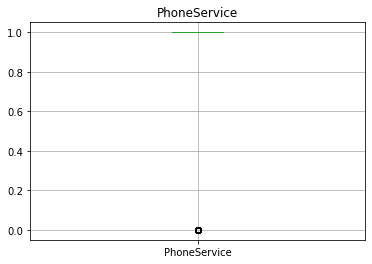

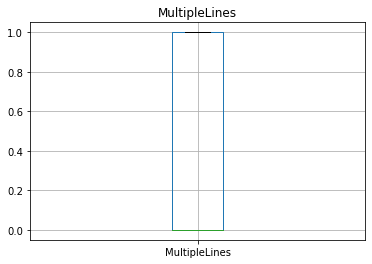

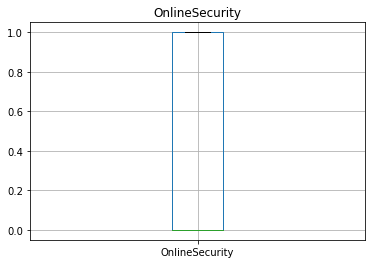

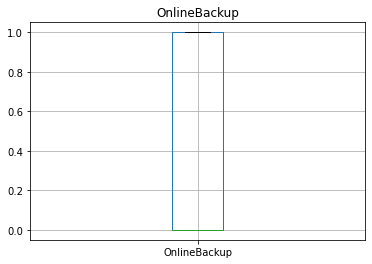

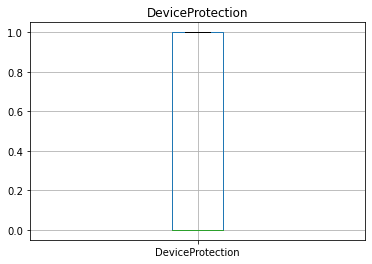

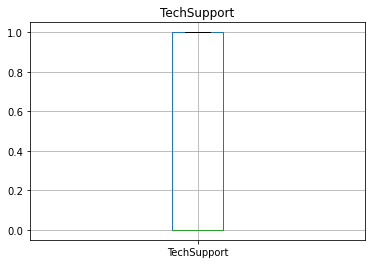

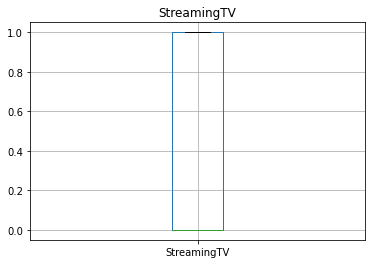

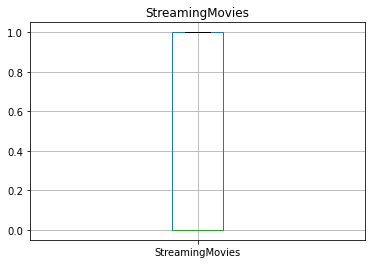

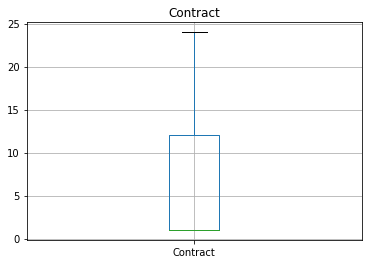

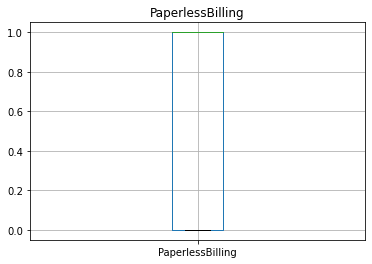

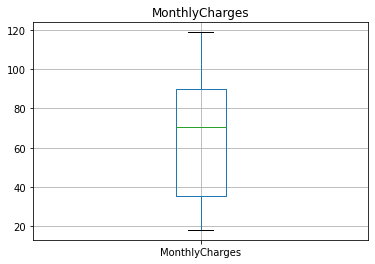

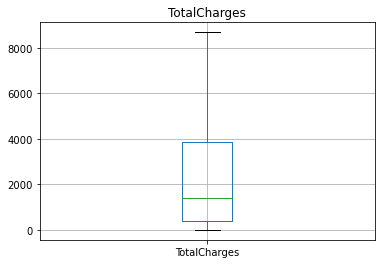

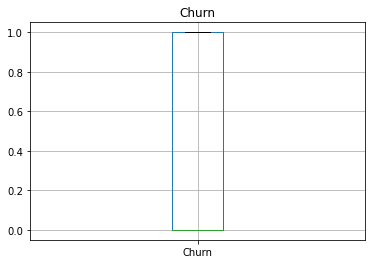

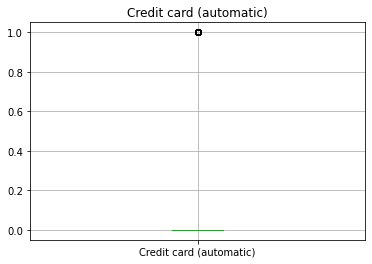

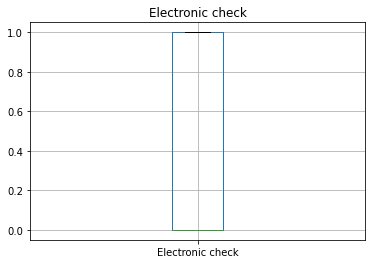

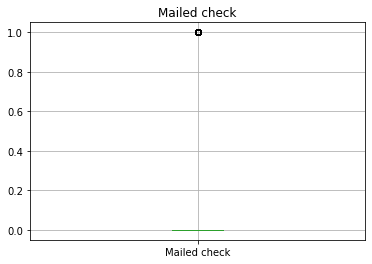

In [19]:
# Outlier Detection
num = ['tenure','MonthlyCharges','TotalCharges']
for f in data.columns:
    data[f].plot(kind='box')
    plt.title(f)
    plt.grid()
    plt.show()

As you can see there are no outliers in the data.

Okay that's enough data exploration for now. Now let's see which features have high impact on churn using tree classifier.

#### Feature Importance:

In [20]:
# Dividing target and independant variables
X = data.drop(['Churn'],axis=1)
y = data['Churn']

In [21]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

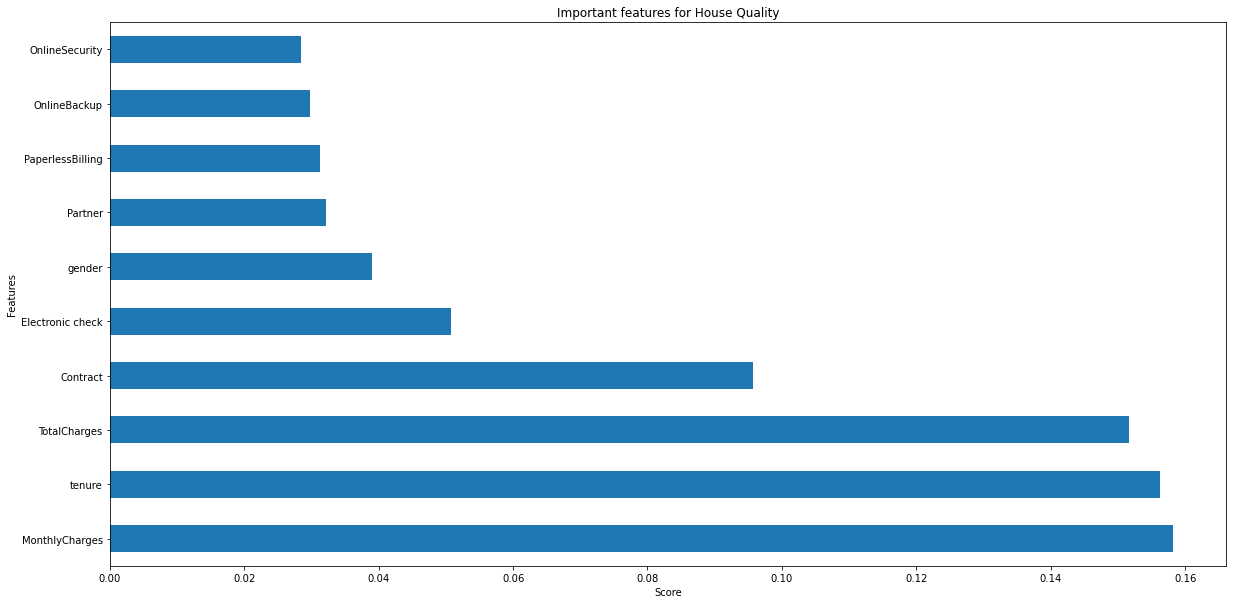

In [22]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(20,10))
plot = feat_importances.nlargest(10).plot(kind='barh')
plt.xlabel('Score')
plt.ylabel('Features')
plt.title('Important features for House Quality')
plt.show()

As you can see Tenure, MonthlyCharges, Total Charges, Contract are the features that have high impact on the Churn. I'm going to move on to finding the best model to predict Churn.

### Model Building

#### Scaling data

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_transform = scaler.fit_transform(X.values)
X_scaled = pd.DataFrame(X_transform, columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Credit card (automatic)', 'Electronic check', 'Mailed check'])

#### Splitting data

In [24]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#### Importing required libraries

In [25]:
# Importing required Libraries
from sklearn.neighbors import KNeighborsClassifier
import xgboost
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve, auc
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn import metrics

#### KNN

In [26]:
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)
score1 = []
# For choosing K value
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn, X_train, y_train, cv = k_fold)
    score1.append(round(np.mean(score)*100, 2))

Text(0, 0.5, 'Score')

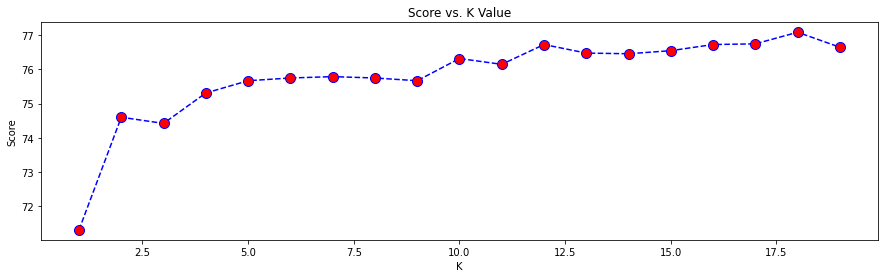

In [27]:
# Plotting Score vs K value 
plt.figure(figsize=(15,4))
plt.plot(range(1,20),score1,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Score vs. K Value')
plt.xlabel('K')
plt.ylabel('Score')

#### Evaluation Metrics

In [28]:
# As you can see at neighbours 10, the score is high
classifier1 = KNeighborsClassifier(n_neighbors = 19)
# predicting output
classifier1.fit(X_train,y_train)
y_pred = classifier1.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
# F1 score
print("F1 score:",round(f1_score(y_test,y_pred,average='weighted'), ndigits = 3))
# Precision
print("precision score:",round(precision_score(y_test,y_pred,average='weighted'), ndigits = 3))
# Recall
print("recall score:",round(recall_score(y_test, y_pred,average='weighted'), ndigits = 3))
# AUC
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
fp, tp, thresold = roc_curve(y_test, y_pred)
AUC = auc(fp, tp)
print("ROC Area under Curve:",round(AUC, ndigits = 3))

Accuracy: 0.7838063439065108
F1 score: 0.778
precision score: 0.774
recall score: 0.784
ROC Area under Curve: 0.689


#### XGBOOST

In [29]:
classifier2 = xgboost.XGBClassifier()
classifier2.fit(X_train,y_train)
y_pred = classifier2.predict(X_test)
## Hyper Parameter Optimization showing only for XGBoost due to high computational requirement
n_estimators = [50,100, 500, 900, 1100, 1500]
max_depth = [1,2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]
base_score=[0.25,0.5,0.75,1]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }
random_cv = RandomizedSearchCV(estimator= classifier2,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'accuracy',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)
random_cv.fit(X_train,y_train)
random_cv.best_estimator_

[19:00:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    6.3s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  3.2min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:  4.7min finished


[19:04:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.25, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=2,
              min_child_weight=2, missing=nan, monotone_constraints='()',
              n_estimators=900, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [30]:
classifier2 = xgboost.XGBClassifier(base_score=0.25, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=2,
              min_child_weight=2, monotone_constraints='()',
              n_estimators=900, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
classifier2.fit(X_train,y_train)
y_pred = classifier2.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
# F1 score
print("F1 score:",round(f1_score(y_test,y_pred,average='weighted'), ndigits = 3))
# Precision
print("precision score:",round(precision_score(y_test,y_pred,average='weighted'), ndigits = 3))
# Recall
print("recall score:",round(recall_score(y_test, y_pred,average='weighted'), ndigits = 3))
# AUC
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
fp, tp, thresold = roc_curve(y_test, y_pred)
AUC = auc(fp, tp)
print("ROC Area under Curve:",round(AUC, ndigits = 3))

[19:04:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.8038397328881469
F1 score: 0.799
precision score: 0.796
recall score: 0.804
ROC Area under Curve: 0.718


#### Balancing the data

Now, as the data is imbalanced let's balance with over sampling and see if the accuracy increases. We will be using RandomOverSampler package in python to do it.

In [31]:
# Importing SMOTETomek
from imblearn.over_sampling import RandomOverSampler
# Implementing Oversampling for Handling Imbalanced 
os =  RandomOverSampler(random_state=42)
X_res, y_res = os.fit_sample(X_scaled, y)

In [32]:
print('old shape',X.shape,y.shape)
print('New shape SMOTETomek',X_res.shape,y_res.shape)

old shape (5986, 20) (5986,)
New shape SMOTETomek (8798, 20) (8798,)


In [33]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [34]:
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)
score1 = []
# For choosing K value
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn, X_train, y_train, cv = k_fold)
    score1.append(round(np.mean(score)*100, 2))

Text(0, 0.5, 'Score')

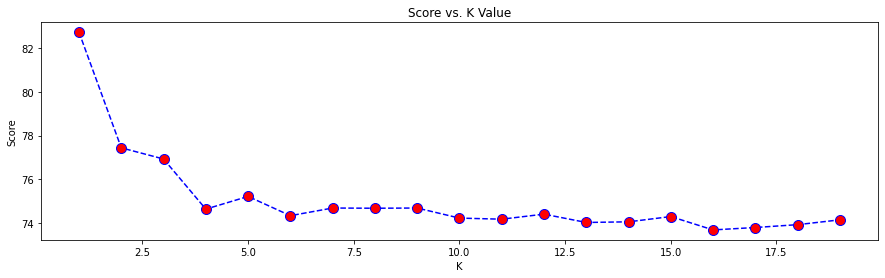

In [35]:
# Plotting Score vs K value 
plt.figure(figsize=(15,4))
plt.plot(range(1,20),score1,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Score vs. K Value')
plt.xlabel('K')
plt.ylabel('Score')

In [36]:
# As you can see at neighbours 10, the score is high
classifier1 = KNeighborsClassifier(n_neighbors = 1)
# predicting output
classifier1.fit(X_train,y_train)
y_pred = classifier1.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
# F1 score
print("F1 score:",round(f1_score(y_test,y_pred,average='weighted'), ndigits = 3))
# Precision
print("precision score:",round(precision_score(y_test,y_pred,average='weighted'), ndigits = 3))
# Recall
print("recall score:",round(recall_score(y_test, y_pred,average='weighted'), ndigits = 3))
# AUC
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
fp, tp, thresold = roc_curve(y_test, y_pred)
AUC = auc(fp, tp)
print("ROC Area under Curve:",round(AUC, ndigits = 3))

Accuracy: 0.8431818181818181
F1 score: 0.842
precision score: 0.853
recall score: 0.843
ROC Area under Curve: 0.845


In [37]:
classifier2 = xgboost.XGBClassifier()
classifier2.fit(X_train,y_train)
y_pred = classifier2.predict(X_test)
## Hyper Parameter Optimization showing only for XGBoost due to high computational requirement
n_estimators = [50,100, 500, 900, 1100, 1500]
max_depth = [1,2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]
base_score=[0.25,0.5,0.75,1]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }
random_cv = RandomizedSearchCV(estimator= classifier2,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'accuracy',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)
random_cv.fit(X_train,y_train)
random_cv.best_estimator_

[19:06:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    1.5s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  1.5min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  3.1min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:  4.4min finished


[19:10:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [38]:
classifier2 = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=15,
              min_child_weight=1,monotone_constraints='()',
              n_estimators=1100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
classifier2.fit(X_train,y_train)
y_pred = classifier2.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
# F1 score
print("F1 score:",round(f1_score(y_test,y_pred,average='weighted'), ndigits = 3))
# Precision
print("precision score:",round(precision_score(y_test,y_pred,average='weighted'), ndigits = 3))
# Recall
print("recall score:",round(recall_score(y_test, y_pred,average='weighted'), ndigits = 3))
# AUC
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
fp, tp, thresold = roc_curve(y_test, y_pred)
AUC = auc(fp, tp)
print("ROC Area under Curve:",round(AUC, ndigits = 3))

[19:10:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.8818181818181818
F1 score: 0.882
precision score: 0.885
recall score: 0.882
ROC Area under Curve: 0.883


For further increasing the accuracy we can use multi layer perceptron/Deep Neural Network and check the accuracy.